### Ｍissing Data

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
dataset=pd.read_csv('Data.csv')
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [69]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,3].values

In [70]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [71]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [72]:
from sklearn.preprocessing import Imputer

In [73]:
#If axis=0, then impute along columns.
#If axis=1, then impute along rows.
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)

In [74]:
#fit
imputer=imputer.fit(X[:,1:3])
#transform
X[:,1:3]=imputer.transform(X[:,1:3])

In [75]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

### Encoder

In [76]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [77]:
#LabelEncoder
label=LabelEncoder()
X[:,0]=label.fit_transform(X[:,0])
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [78]:
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [79]:
s=X[:,0]
s

array([0, 2, 1, 2, 1, 0, 2, 0, 1, 0], dtype=object)

In [62]:
X=datasext.iloc[:,:-1].values

In [80]:
#One-hot Encoding
#categorial_feaatures means which column do you want to change
#I want to change column0 into number
#Notice that NaN should not be exist
onehot=OneHotEncoder(categorical_features=[0])
X=onehot.fit_transform(X).toarray()
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.87777778e+01,
        5.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.70000000e+01,
        6.70000000e+04]])

In [81]:
X=pd.DataFrame(X)

In [82]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [86]:
np.unique(y)

array(['No', 'Yes'], dtype=object)

先利用np.unique，先知道No是第一個，序號是0，因此labelencoder會從No開始編碼
若不是自己要的順序，自己再調整

In [91]:
label=LabelEncoder()
s=label.fit(np.unique(y))
y=s.transform(y)

In [92]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

### Split Dataset into training set and test set

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [95]:
X_train

,0,1,2,3,4
4,0.0,1.0,0.0,40.000000,63777.777778
9,1.0,0.0,0.0,37.000000,67000.000000
1,0.0,0.0,1.0,27.000000,48000.000000
6,0.0,0.0,1.0,38.777778,52000.000000
7,1.0,0.0,0.0,48.000000,79000.000000
3,0.0,0.0,1.0,38.000000,61000.000000
0,1.0,0.0,0.0,44.000000,72000.000000
5,1.0,0.0,0.0,35.000000,58000.000000


In [96]:
X_test

,0,1,2,3,4
2,0.0,1.0,0.0,30.0,54000.0
8,0.0,1.0,0.0,50.0,83000.0


In [97]:
y_train

array([1, 1, 1, 0, 1, 0, 0, 1])

In [98]:
y_test

array([0, 0])

### Feature Scaling 特徵縮放

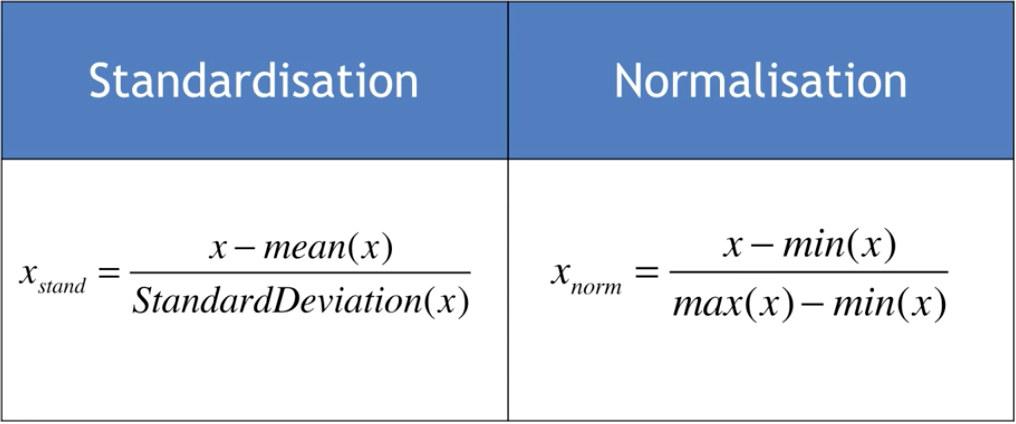

In [103]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [100]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
#sc_X已經fit擬合過，下面不需要再fit
X_test=sc_X.transform(X_test)

In [101]:
X_train

array([[-1.        ,  2.64575131, -0.77459667,  0.26306757,  0.12381479],
       [ 1.        , -0.37796447, -0.77459667, -0.25350148,  0.46175632],
       [-1.        , -0.37796447,  1.29099445, -1.97539832, -1.53093341],
       [-1.        , -0.37796447,  1.29099445,  0.05261351, -1.11141978],
       [ 1.        , -0.37796447, -0.77459667,  1.64058505,  1.7202972 ],
       [-1.        , -0.37796447,  1.29099445, -0.0813118 , -0.16751412],
       [ 1.        , -0.37796447, -0.77459667,  0.95182631,  0.98614835],
       [ 1.        , -0.37796447, -0.77459667, -0.59788085, -0.48214934]])

In [102]:
X_test

array([[-1.        ,  2.64575131, -0.77459667, -1.45882927, -0.90166297],
       [-1.        ,  2.64575131, -0.77459667,  1.98496442,  2.13981082]])